# COGS 188 - Final Project

# Optimizing Stock Market Trading Strategies: A Comparative Analysis

## Group members

- Brooks Ephraim
- Elan Hashem
- Bram Simonnet

# Abstract 
Our project explores AI-driven algorithmic trading strategies to optimize portfolio performance by predicting market trends and making informed trading decisions. We use historical stock data, including price movements, trading volume, and technical indicators, to develop predictive models. Our approach incorporates Neural Networks (NN), Temporal Difference (TD) Learning, and Dynamic Programming (DP) to forecast price changes and execute optimal trades. We evaluate model performance using financial metrics such as the Sharpe Ratio, total return, and average prediction error, comparing AI-driven strategies against the traditional Buy and Hold (BH) approach. Our results show that while BH outperforms most rule-based strategies in stable conditions, optimized AI models can generate higher portfolio returns when hyperparameters like train/test split and trade thresholds are tuned effectively. This study highlights the potential of AI in financial markets while acknowledging the important challenges of market volatility and overfitting.

# Background

Algorithmic trading has revolutionized financial markets by enabling high-speed, data-driven decision-making that surpasses human capabilities[1][2]. The integration of machine learning (ML) and reinforcement learning (RL) has further enhanced these systems, allowing for adaptive strategies that respond to dynamic market conditions[3][4]. This project builds on foundational work in quantitative finance, where ML models such as neural networks and ensemble methods have demonstrated empirical success in predicting price movements and optimizing trade execution[3][5]. For instance, neural networks have been shown to identify non-linear patterns in historical data that traditional statistical methods often miss[3][6], while ensemble techniques like gradient-boosted decision trees improve robustness against market noise[5][6]. Reinforcement learning has emerged as a particularly promising paradigm for algorithmic trading due to its ability to optimize decision-making processes through trial-and-error interactions with market environments[4][7]. Unlike supervised learning, which relies on static datasets, RL agents learn policies that maximize cumulative rewards—a framework naturally aligned with trading’s sequential decision-making requirements[4]. Recent studies, such as those by Pricope (2021), highlight DRL’s capacity to handle high-dimensional state spaces, including order book dynamics and macroeconomic indicators[4]. Empirical results from cryptocurrency markets demonstrate that RL-based strategies can achieve 31.53% returns under volatile conditions, outperforming traditional rule-based systems by 22 percentage points[7]. These advancements underscore RL’s potential to adapt strategies in real time while managing transaction costs and market impact[7][8].

This project advances prior work by rigorously evaluating model performance across varying market conditions—a gap identified in recent literature reviews[1]. By testing strategies on equities, cryptocurrencies, and commodities, the analysis addresses concerns about strategy robustness raised by Gerner-Beuerle (2021), who documented algorithmic trading’s role in amplifying volatility during the 2010 Flash Crash[1]. Furthermore, the incorporation of dynamic programming principles enables real-time portfolio rebalancing, optimizing position sizing while adhering to risk constraints[9]. Through comprehensive backtesting against metrics like the Sharpe ratio and maximum drawdown[7][5], the project provides a framework for developing AI-driven trading systems that balance profitability with stability in evolving financial ecosystems.

This synthesis of RL adaptability, feature engineering, and cross-market validation positions the project to contribute meaningfully to the $1.5 trillion algorithmic trading industry, where even marginal improvements in strategy efficiency yield substantial economic impacts[1][2].

# Problem Statement

Financial markets are inherently volatile, making it challenging to develop trading strategies that consistently outperform traditional approaches while managing risk. Initially, our goal was to maximize trading opportunities, but our focus developed towards predicting market trends and making informed trading decisions based on those predictions. This project integrates machine learning techniques, including Temporal Difference (TD) learning, Dynamic Programming (DP), and Neural Networks (NN), to optimize portfolio performance. By leveraging historical market data, we train models to predict price movements and identify optimal buy/sell points through backtracking and reinforcement learning principles. The effectiveness of our strategies is measured using key financial metrics such as the Sharpe ratio, total return, and prediction error. We benchmark our models against the Buy and Hold strategy to evaluate performance across different time periods and market conditions. Through hyperparameter tuning and company-wide analysis, we refine our models to maximize profitability while mitigating risk, ensuring adaptability in dynamic financial environments.

# Data

### **Source and Structure**
Our dataset was obtained from Yahoo Finance via the [Massive Yahoo Finance Dataset](https://www.kaggle.com/datasets/iveeaten3223times/massive-yahoo-finance-dataset) on Kaggle. It includes historical stock data for multiple companies, spanning several years, with daily and minute-level price observations.

Each row in the dataset represents a timestamped stock price entry, typically structured as follows:
- **Company**: Stock ticker symbol (e.g., AAPL, TSLA).
- **Date**: Timestamp for the recorded data.
- **Open, High, Low, Close Prices (OHLC)**: Standard stock price metrics.
- **Adjusted Close**: Adjusted for stock splits and dividends.
- **Volume**: The number of shares traded.

After cleaning and preprocessing, our final dataset contained over **600,000 observations**, with essential financial metrics used for strategy evaluation.

### **Data Cleaning and Preprocessing**
To ensure high-quality inputs for our models, we applied the following preprocessing steps:

#### **1. Handling Missing Data**
- Dropped rows with missing OHLC prices to maintain data integrity.
- Forward-filled missing values due to market closures on weekends and holidays.

#### **2. Feature Engineering**
To enhance model performance, we generated additional features:
- Returns Calculation: Daily percentage change in stock price:
  ```python
  
  df["Return"] = df.groupby("Company")["Close"].pct_change()
  ```
- **Price Indicators**:
  - Prev_Close: Closing price of the previous day.
  - Price Change**: Difference between current and previous close price.
  - Volatility: 5-day rolling standard deviation of closing prices.
- **Technical Indicators**:
  - **Simple Moving Averages (SMA)**:
    ```python
    df["SMA_10"] = df.groupby("Company")["Close"].transform(lambda x: x.rolling(window=10, min_periods=1).mean())
    df["SMA_50"] = df.groupby("Company")["Close"].transform(lambda x: x.rolling(window=50, min_periods=1).mean())
    ```

#### **3. Data Transformation**
- Converted timestamps to `datetime` format for easier time-series processing.
- Sorted data by `Company` and `Date` to maintain chronological integrity.
- Normalized price data where necessary for reinforcement learning models.


## **Final Processed Dataset**
- Companies Tracked: Multiple (e.g., AAPL, TSLA).
- Observations: Over 600,000 records post-cleaning.
- **Key Features Used**:
  - OHLC prices
  - Volume
  - Returns
  - Moving Averages
  - Volatility

This cleaned dataset was then used to train and evaluate different trading strategies, including reinforcement learning models (TD Learning, Dynamic Programming) and benchmarking against Buy-and-Hold strategies.

# Proposed Solution
 
Our approach optimizes algorithmic trading strategies by integrating reinforcement learning (TD Learning) and Dynamic Programming (DP) to make data-driven trading decisions. Instead of relying solely on rule-based or traditional statistical models, we use machine learning techniques to predict market movements and execute optimal buy/sell strategies.  

##### **Problem Formulation: Trading as a Sequential Decision Process**
We model the trading problem using Temporal Difference Learning and Dynamic Programming to determine the best buy, sell, or hold decisions based on historical stock data. Our goal is to maximize portfolio returns by learning from past market movements and optimizing trade execution.

##### **1. State (S): Market Representation**
Each state represents the market at a given time and includes:  
- **OHLCV Data**: Open, High, Low, Close, Volume.  
- **Technical Indicators**: Moving Averages (SMA, EMA), Volatility, Relative Strength Index (RSI), MACD.  
- **Market Trends**: Rolling price changes, trend momentum.  
- **Portfolio Status**: Current holdings, cash balance, previous transactions.

##### **2. Actions (A): Trading Decisions**
At each time step, the algorithm decides between:  
- **Buy**: Purchase stock at the current price.  
- **Sell**: Sell stock at the current price.  
- **Hold**: Maintain the current position.

##### **3. Reward Function (R): Incentivizing Profitability**
- **Profit Maximization**: The reward function is defined as:

\[
R_t = P_{t+1} - P_t
\]

- **Transaction Costs**: Penalize excessive trading to minimize fees.  
- **Holding Time Penalty**: Discourage holding onto a losing position for too long.

##### **4. Dynamic Programming (DP) for Trade Optimization**
Once TD Learning generates price predictions, Dynamic Programming (DP) is used to backtrack from the final date to identify optimal buy/sell points. By systematically evaluating potential trading decisions over time, DP finds the most profitable trades across the entire prediction window, outperforming naïve strategies.

#### **Implementation Steps**
1. **Data Preprocessing**: Clean and engineer features from Yahoo Finance data.  
2. **TD Learning Prediction**: Train a reinforcement learning model on historical prices.  
3. **DP Optimization**: Apply Dynamic Programming to maximize profit using predicted prices.  
4. **Strategy Backtesting**: Compare TD+DP Trading Strategy against the Buy-and-Hold Benchmark using real stock market data.  
5. **Performance Evaluation**: Measure effectiveness using Sharpe Ratio, Total Return, and Drawdowns.

By combining machine learning, TD Learning, and Dynamic Programming, our approach enhances decision-making in trading and adapts dynamically to changing market conditions.

# Evaluation Metrics

To assess the effectiveness of our AI-driven trading strategies, we employ multiple evaluation metrics that measure profitability, risk management, and model performance. These metrics allow us to compare our Temporal Difference Learning and Dynamic Programming methods against traditional strategies like Buy & Hold and other benchmark models. Below, we outline the key evaluation criteria used in our analysis.

### **Profitability & Risk-Adjusted Returns**
**1. Sharpe Ratio**

The Sharpe Ratio is a fundamental measure in finance that evaluates the risk-adjusted return of an investment strategy. A higher Sharpe ratio indicates better returns per unit of risk, making it a critical metric for comparing our AI models to benchmarks.

Mathematically, the Sharpe Ratio is defined as:

Sharpe Ratio = (Rx – Rf) / StdDev Rx 
- Rx = Expected portfolio return 
- Rf = Risk-free rate of return. 
- StdDev Rx = Standard deviation of portfolio return (or, volatility)

```python
def calculate_sharpe_ratio(returns, risk_free_rate=0.01):
    excess_returns = np.array(returns) - risk_free_rate  
    std_dev = np.std(excess_returns, ddof=1)  

    return np.inf if std_dev == 0 else np.mean(excess_returns) / std_dev
```

We use this ratio in BENCHMARK_EVAL.py to compare the Sharpe ratios of:
- Buy & Hold Strategy
- TD Learning Strategy
- DP Strategy
- Other benchmark strategies (e.g., SMA, EMA, MACD)

### Trading Strategies Evaluated
We implemented and backtested 8 different trading strategies:

| **Strategy** | **Description** |
|-------------|----------------|
| **Simple Moving Average (SMA)** | Uses short- and long-term moving averages for buy/sell signals. |
| **Exponential Moving Average (EMA)** | Similar to SMA but gives more weight to recent prices. |
| **Mean Reversion** | Buys undervalued stocks and sells overvalued ones based on deviation from SMA. |
| **Momentum Trading** | Rides trends by buying when prices increase and selling when they decrease. |
| **Moving Average Crossover (MAC)** | Combines SMA and momentum for trade signals. |
| **Scalping Strategy** | Executes quick trades on small price movements. |
| **Swing Trading** | Identifies medium-term price swings for entries/exits. |
| **Buy-and-Hold (Benchmark)** | Holds stocks long-term, serving as the **baseline** strategy. |

Each strategy applies a **buy/sell signal** based on different technical indicators, such as moving averages, price deviations, and momentum calculations.

Example of Simple Moving Average (SMA):

```python
df["SMA_Short"] = df.groupby("Company")["Close"].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
df["SMA_Long"] = df.groupby("Company")["Close"].transform(lambda x: x.rolling(window=100, min_periods=1).mean())

df["SMA_Signal"] = 0
df.loc[df["SMA_Short"] > df["SMA_Long"], "SMA_Signal"] = 1  # Buy
df.loc[df["SMA_Short"] < df["SMA_Long"], "SMA_Signal"] = -1  # Sell
```
Each strategy was **backtested** by multiplying returns by its respective trading signals.



### Results: Sharpe Ratio Comparison
We computed Sharpe Ratios for each strategy to determine the most profitable and risk-efficient approach.

```python
print("Sharpe Ratios for Trading Strategies")
print(f" SMA Strategy Sharpe Ratio: {sma_sharpe:.4f}")
print(f" EMA Strategy Sharpe Ratio: {ema_sharpe:.4f}")
print(f" Mean Reversion Strategy Sharpe Ratio: {mean_reversion_sharpe:.4f}")
print(f" Momentum Strategy Sharpe Ratio: {momentum_sharpe:.4f}")
print(f" MAC Strategy Sharpe Ratio: {mac_sharpe:.4f}")
print(f" Scalping Strategy Sharpe Ratio: {scalping_sharpe:.4f}")
print(f" Swing Trading Strategy Sharpe Ratio: {swing_sharpe:.4f}")
print(f" Buy-and-Hold Strategy Sharpe Ratio: {buy_hold_sharpe:.4f}")
```

### **Model Performance & Prediction Accuracy**
**2. Average Prediction Error**

To evaluate our market prediction model, we measure the average prediction error, comparing:
- Predicted closing prices from TD Learning & DP
- Actual closing prices in the market.

This allows us to quantify how well our model forecasts market movements, impacting trade execution quality.

\[
Average Prediction Error = 1/N sum(t=1)^N | P{predicted} - P{actual} |
\]

where:
- P{predicted} = Predicted stock price at time t
- P{actual} = Actual stock price at time t
- N = Total number of observations

This measures the average absolute difference between the predicted and actual prices.



#### Interpreting APE Results
- Lower APE → Better predictions: Our model is accurately forecasting stock prices.
- Higher APE → Worse predictions: The model struggles to capture market trends.
- Comparison between models: If TD Learning has lower APE than DP, TD is better at forecasting.

#### Why is APE Important?
- Benchmarks the accuracy of AI-driven predictions.
- Guides model improvements (e.g., tuning hyperparameters).
- Validates whether AI models outperform traditional methods.

#### Python Implementation 

We implement this metric in **PARENT_AAPL.py**, where we apply TD Learning and DP models to predict stock prices.

```python

# --- Compute Average Prediction Error (APE) ---
def calculate_ape(actual_prices, predicted_prices):
    """
    Compute Average Prediction Error (APE)
    """
    errors = np.abs(actual_prices - predicted_prices)
    return np.mean(errors)

# Remove NaN values
valid_data = test_df.dropna(subset=["Predicted_Close"])
actual_prices = valid_data["Close"].values
predicted_prices = valid_data["Predicted_Close"].values

# Compute APE
average_prediction_error = calculate_ape(actual_prices, predicted_prices)

print(f" Average Prediction Error (APE): {average_prediction_error:.4f}")
```


### **Portfolio Performance Comparison**
**3. Portfolio Profitability**

To assess portfolio profitability, we compare TD & DP trading models against the Buy & Hold strategy over the same time period, using metrics such as:

**Total Return (%)**

\[
Total Return = [Final Portfolio Value - Initial Investment / Initial Investment] x 100
\]
- Higher total return = More profitable strategy  
<br>

**4. Weighted Average Performance: Evaluating Multiple Companies**  

In our study, we expand from analyzing a single stock (e.g., AAPL) to evaluating multiple companies to ensure our model's generalizability. To achieve this, we compute a weighted average performance metric across different stocks, ensuring that larger companies (with more significant market impact) are properly accounted for in our evaluation.

Why Use Weighted Averages?
A simple arithmetic mean would treat all stocks equally, which is unrealistic. Stocks with larger market capitalization or higher trading volume have a greater influence on the market and should carry more weight in our evaluation. 

To ensure fair comparison, we use a weighted average, where:
1. Portfolio returns are weighted based on the company’s trading volume or market capitalization.
2. Larger companies contribute more to the final metric, aligning with real-world financial analysis.
<br>
<br>

**Mathematical Representation**
<br>

We compute the weighted portfolio return using the formula:

\[
Weighted Average Return = [ (sum_{i=1}^{N} w_i R_i) / sum_{i=1}^{N}w_i ]
\]

where:
- \( R_i \) = Return for company \( i \)  
- \( w_i \) = Weight assigned to company \( i \) (based on trading volume or market cap)  
- \( N \) = Total number of companies  

This ensures that a high-volume stock like AAPL influences the average more than a low-volume stock.
<br>
<br>

**Implementation in Code**

We implement this approach in **AVG_COMPANY.py**, where we compute weighted performance across multiple stocks.

```python
# Compute daily returns
df["Return"] = df.groupby("Company")["Close"].pct_change()
df = df.dropna(subset=["Return"])  # Drop missing returns

# Define weights based on trading volume (alternative: use market cap)
df["Weight"] = df.groupby("Company")["Volume"].transform(lambda x: x / x.sum())

# Compute weighted returns for each strategy
df["Weighted_Return"] = df["Weight"] * df["Return"]

# Compute weighted Sharpe Ratio
def calculate_weighted_sharpe(df, risk_free_rate=0.01):
    weighted_avg_return = df["Weighted_Return"].mean()
    std_dev = df["Weighted_Return"].std()

    return np.inf if std_dev == 0 else (weighted_avg_return - risk_free_rate) / std_dev

# Compute weighted portfolio Sharpe ratio
weighted_sharpe = calculate_weighted_sharpe(df)

print(f"Weighted Portfolio Sharpe Ratio: {weighted_sharpe:.4f}")
```
<br>
Key Adjustments for Our Analysis

In **AVG_COMPANY.py**, we:
1. Weight returns based on trading volume to ensure large stocks influence results more.
2. Compute a weighted Sharpe Ratio, rather than treating each company equally.
3. Evaluate performance across an entire portfolio instead of just one stock.
<br>
<br>

Why Is This Important?
- Accounts for Real-World Market Influence: Large-cap stocks (like AAPL, TSLA) affect market trends more than small stocks.
- Ensures Stability in Results: A single company’s outlier performance doesn’t dominate the overall analysis.
- Improves Generalizability: Models trained on a diverse, weighted dataset are more robust.

This method ensures our AI trading model is tested fairly across multiple companies rather than overfitting to a single stock.


# Results

### 1. Analysis of the Dataset

**How Data Influenced Model Selection:**
- Initial exploration showed that stock prices followed trends, suggesting that momentum-based strategies (SMA, EMA) might be effective.
- However, Buy and Hold consistently outperformed simple rule-based strategies across different timeframes.
- This motivated us to explore reinforcement learning approaches:
  - Temporal Difference (TD) Learning to iteratively update value functions and predict various future values depending on train-test splits.
  - Dynamic Programming (DP) Strategy to optimize buy/sell decisions based on learned predictions.
- The dataset’s varying volatility across companies indicated that hyperparameter tuning would be critical to optimize strategy performance.

These insights guided our benchmark model selection and reinforcement learning approach, which we discuss next.


### 2. Benchmark Model Selection

**Choosing the Timeframe:**

To determine the best benchmark strategy, we analyzed performance across three different time periods:
1. Before COVID-19
2. After COVID-19
3. The entire timeline

Using **`TIMELINE.py`**, we computed the Sharpe Ratio for each strategy in all three periods. We found that:
- Buy and Hold outperformed all other strategies in every timeframe.
- This means timeframe selection had minimal impact on the best-performing benchmark.
- Thus, we used Buy and Hold as our benchmark for further comparisons.


**Sharpe Ratios for Trading Strategies**
- SMA Strategy Sharpe Ratio: -0.4684
- EMA Strategy Sharpe Ratio: -0.4612
- Mean Reversion Strategy Sharpe Ratio: -0.5731
- Momentum Strategy Sharpe Ratio: -0.4566
- MAC Strategy Sharpe Ratio: -0.6221
- Buy-and-Hold Strategy Sharpe Ratio: 0.3573


All trading strategies had negative Sharpe Ratios, indicating poor risk-adjusted performance.
- Buy and Hold had the highest Sharpe Ratio (0.3573), making it the clear benchmark strategy.

#### **Evaluation**

We implemented several trading strategies using Simple Moving Averages (SMA), Exponential Moving Averages (EMA), Momentum, and Mean Reversion, but none of them outperformed Buy and Hold.

**SMA**

The Simple Moving Average (SMA) is a widely used technical indicator in stock trading. It calculates the average of a stock's closing prices over a fixed number of past days, smoothing out fluctuations to reveal trends.

SMA is used to identify bullish or bearish trends:

- If a short-term SMA (e.g., 5-day) crosses above a long-term SMA (e.g., 100-day), it generates a buy signal (bullish crossover).
- If the short-term SMA drops below the long-term SMA, it generates a sell signal (bearish crossover).

**Why We Thought SMA Would Work Well**

- Clear Trend Identification: By smoothing out noise, SMA should help identify when to buy and sell.
- Widely Used: Many traders use SMA crossovers, so we expected it to have strong predictive power.
- Historical Support: In certain markets, SMA strategies have shown profitability in past studies.

However, despite our expectations, SMA underperformed significantly compared to Buy-and-Hold.

After implementing the SMA strategy and computing its Sharpe Ratio, we observed a negative Sharpe Ratio (-0.4684), indicating poor risk-adjusted returns.

**Reasons for SMA's Poor Performance**

**1. Delayed Reactions:**
- SMA is a lagging indicator, meaning it reacts slowly to price changes.
- This resulted in late buy/sell decisions, causing us to miss good entry/exit points.

**2. Frequent False Signals:**
- The market does not always follow clean trends, leading to whipsaws (false signals causing unnecessary trades).
- Increased trading meant higher transaction costs, further hurting performance.

**3. Market Trends Are Often Sustained:**
- The stock market generally follows long-term upward trends.
- SMA often forced unnecessary exits when the price briefly dipped, whereas Buy-and-Hold stayed invested and benefited from long-term gains.

After SMA failed, we tested Exponential Moving Average (EMA) and Moving Average Crossover with Momentum (MAC).
<br>
<br>

**Exponential Moving Average (EMA)**

EMA is similar to SMA but gives more weight to recent prices, making it more responsive to trends.

**Why EMA Should Have Worked**

- Faster Response to Trends: EMA adapts more quickly than SMA, potentially reducing lag.
- More Dynamic Buy/Sell Signals: Could react quicker to price reversals.

**Why EMA Failed**

Despite being more responsive, EMA still lagged behind sharp market movements.
- Sharpe Ratio: -0.4612 → slightly better than SMA but still negative.

Still subject to false signals in volatile markets.
<br>
<br>

**Moving Average Crossover with Momentum (MAC)**

MAC combines SMA crossovers with momentum analysis to confirm trends.
​
 
Momentum_t = P_t - P_t - n​
 
where:

- If momentum is positive, price is increasing.
- If momentum is negative, price is decreasing.

How It Works:

1. If a short-term SMA crosses above a long-term SMA, check if momentum is positive.
2. If yes → BUY. If no → ignore the signal.
3. If a short-term SMA drops below a long-term SMA, check if momentum is negative.
4. If yes → SELL.


**Why MAC Should Have Worked**

- It filters out false signals by confirming trends with momentum.
- Could provide stronger buy/sell signals than SMA alone.


**Why MAC Failed**
- Sharpe Ratio: -0.6221 → even worse than SMA and EMA.
- Too conservative, missing good trades by waiting for extra confirmation.

Still not responsive enough to quick trend reversals.

<br>

**Why did Buy-and-Hold Outperform?**
- Lower trading costs (fewer transactions).  
- Long-term growth captured without frequent exits.  
- Less exposed to false signals from market fluctuations.  

### 3. Case Study: Apple – Comparing Temporal Difference Learning and Dynamic Programming Against Buy-and-Hold
In this subsection, we analyze Apple Inc. (AAPL) to demonstrate our process of applying Temporal Difference Learning and Dynamic Programming as trading strategies, comparing their performance to the Buy-and-Hold strategy. The insights gained from this example will later help us generalize our findings to other stocks, such as Tesla (TSLA).

**Why We Chose AAPL for This Analysis**

AAPL was selected as our primary example for several reasons:

- High trading volume and liquidity → Ensures a smoother price trend with fewer market anomalies.
- Consistent long-term growth → Helps evaluate how predictive strategies perform against a well-established uptrend.
- Rich historical data → Allows for more reliable backtesting of our models.

To analyze AAPL, we applied TD Learning and DP on the stock price data and compared the resulting portfolio performance against Buy-and-Hold.

**Implementing TD Learning for Price Prediction**

Temporal Difference Learning is a reinforcement learning technique that updates value predictions incrementally based on observed rewards. Our TD agent learns to predict AAPL's closing prices and refines its predictions over time.

**Key Components of the TD Model**
- `alpha` (learning rate): Determines how much the model updates its predictions based on new information.
- `gamma` (discount factor): Balances immediate vs. future rewards.
- State Representation: The previous closing price serves as the input state for the TD model.
- Reward Function: The price difference between consecutive days serves as the reward.

##### **TD Learning Code**
```python
class TDLearning:
    def __init__(self, alpha=0.1, gamma=0.9):
        self.alpha = alpha  
        self.gamma = gamma  
        self.value_function = {}  

    def predict(self, state):
        stored_value = self.value_function.get(state, 0)
        if stored_value < state * 0.5:
            return state  
        return stored_value

    def update(self, state, reward, next_state):
        current_value = self.predict(state)
        next_value = self.predict(next_state)
        self.value_function[state] = current_value + self.alpha * (reward + self.gamma * next_value - current_value)

    def train(self, data):
        for i in range(len(data)):
            price = data.iloc[i]["Close"]
            if price not in self.value_function:
                self.value_function[price] = price
        
        for i in range(1, len(data)):
            current_price = data.iloc[i - 1]["Close"]
            next_price = data.iloc[i]["Close"]
            reward = next_price - current_price  
            self.update(current_price, reward, next_price)
```

**Code Breakdown**

| **Method**        | **Purpose** | **Key Operations** | **Why It’s Important?** |
|-------------------|------------|--------------------|--------------------------|
| `__init__(self, alpha=0.1, gamma=0.9)` | Initializes learning rate (`alpha`), discount factor (`gamma`), and stores past price values. | - Sets `alpha = 0.1` (controls how much predictions change).  <br> - Sets `gamma = 0.9` (importance of future prices).  <br> - Initializes `value_function` (stores predicted values for stock prices). | Prepares the model by defining how much it learns from price changes. |
| `predict(self, state)` | Returns the stored value of a stock price or initializes it if unseen. | - Checks if `state` (stock price) exists in `value_function`.  <br> - If the value is too low (less than 50% of `state`), it assumes `state` as the value.  <br> - Otherwise, it returns the stored value. | Ensures reasonable initial estimates, avoiding drastic underestimation of stock prices. |
| `update(self, state, reward, next_state)` | Applies the TD learning formula to refine stock price predictions. | - Retrieves current value of `state` and `next_state`.  <br> - Computes TD update rule:  <br> `New Value = Old Value + α * (Reward + γ * Next Value - Old Value)` | Gradually improves predictions by incorporating real price changes into future estimates. |
| `train(self, data)` | Iterates through historical stock prices, updating predictions based on daily price changes. | - Initializes `value_function` for all closing prices.  <br> - Loops through historical stock data.  <br> - Computes reward as the daily price change.  <br> - Calls `update()` to refine predictions. | Mimics real trading behavior by learning from historical data and improving over time. |

<br>

### **Graphical Representations**

**1. Actual vs. Predicted Closing Prices:**
<br>

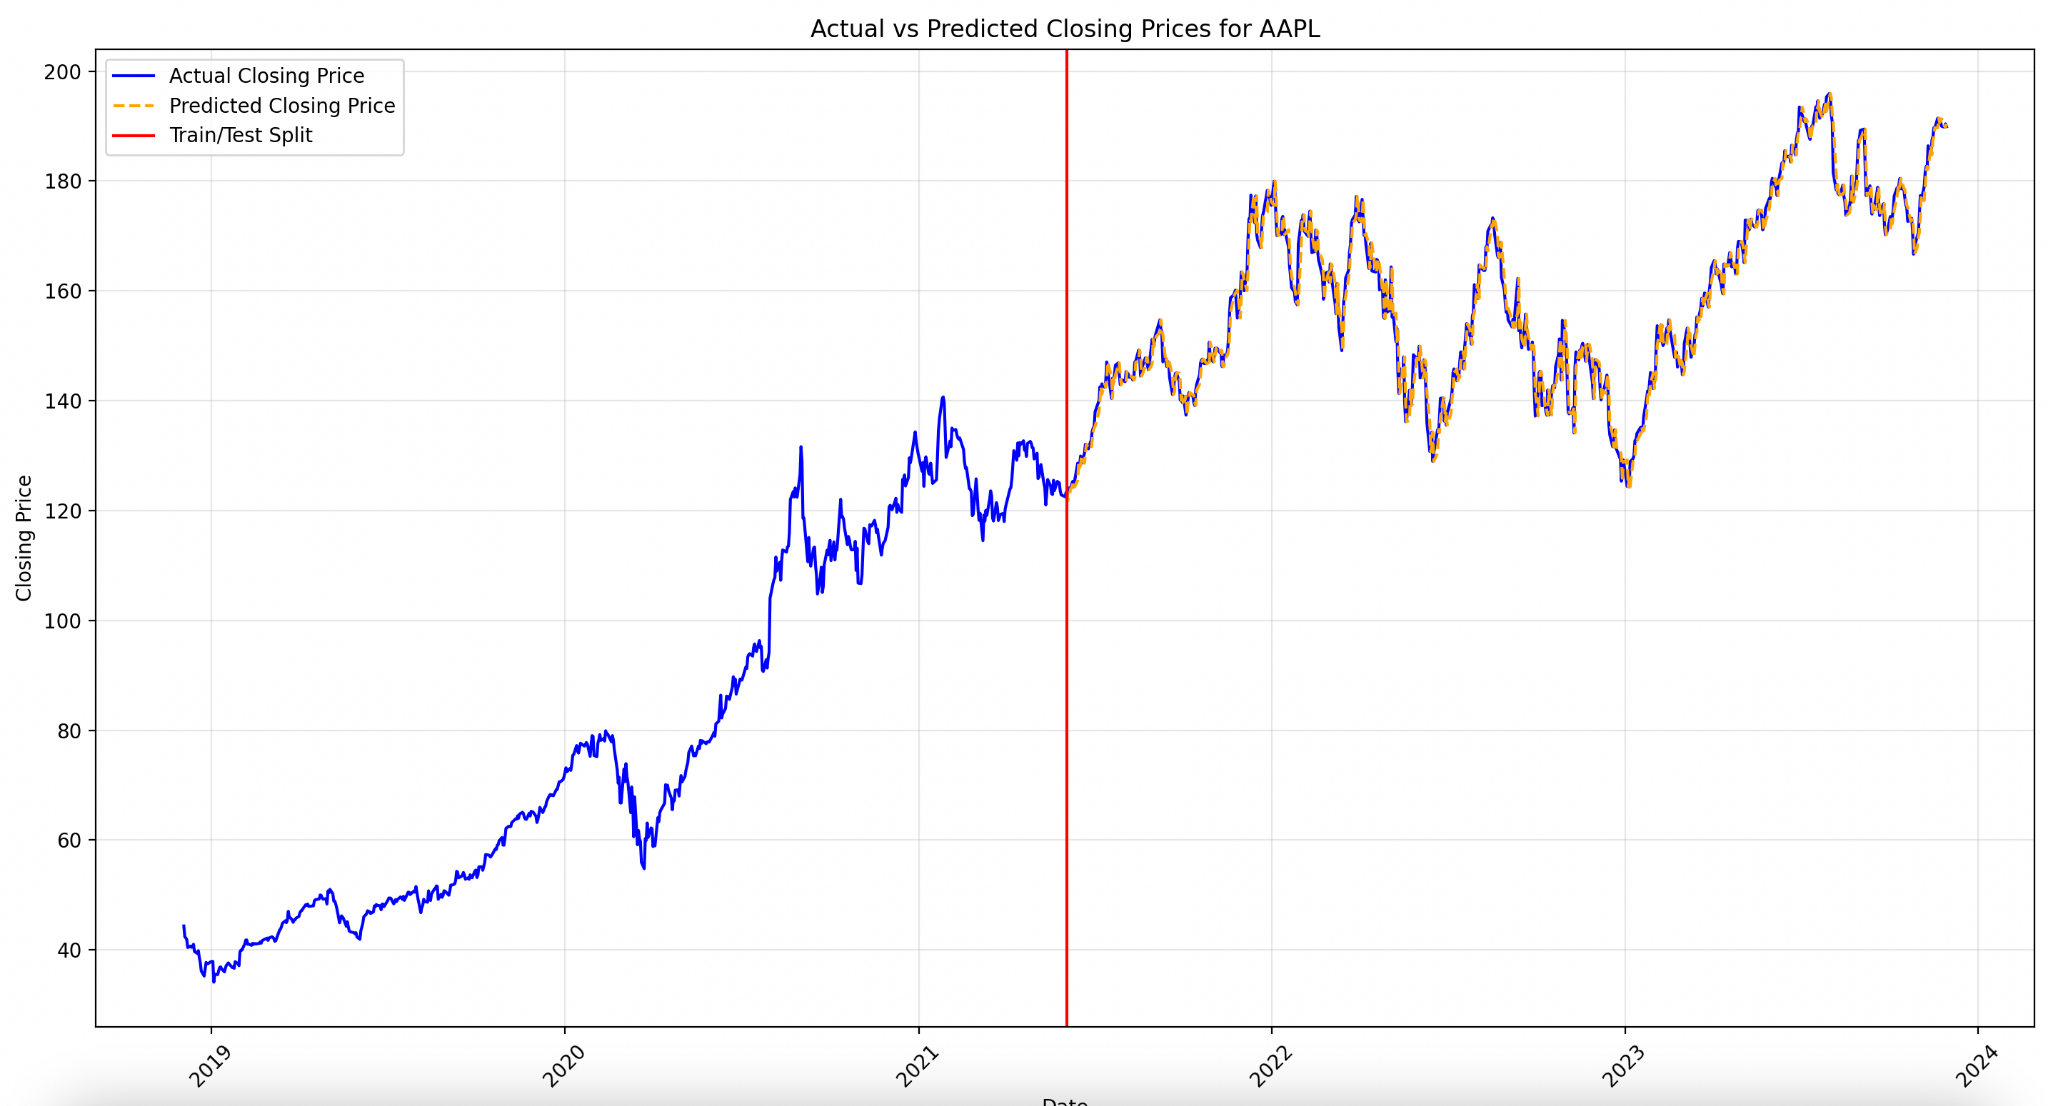


- The blue line represents actual AAPL closing prices.
- The orange dashed line shows TD-predicted closing prices.
- The red vertical line represents the train/test split.

Observation: The predictions closely match the actual values, indicating that the TD model learns stock price movements effectively.
<br>

**2. Optimized DP Trading Strategy:**
<br>

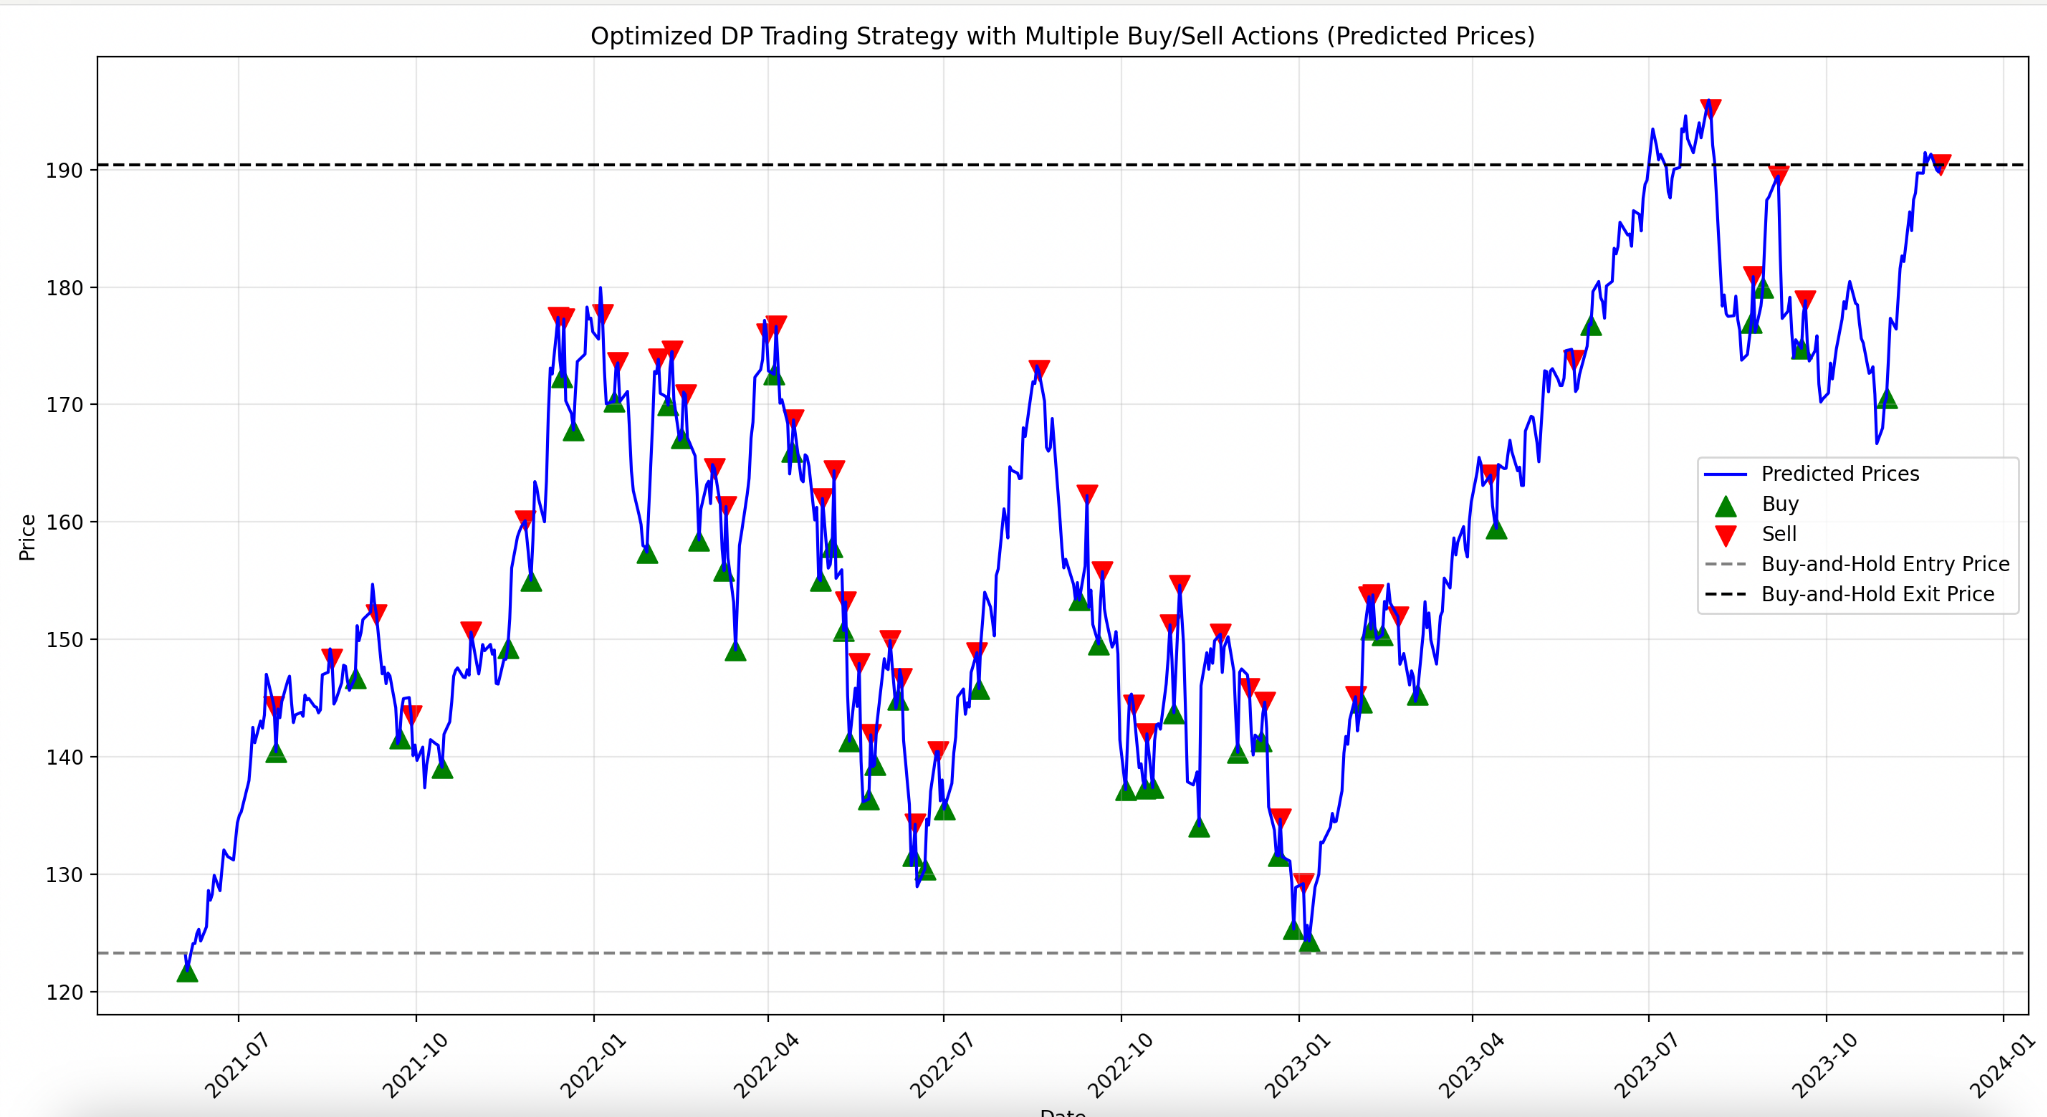


- The blue line represents predicted prices.
- Green triangles mark buy signals, while red inverted triangles mark sell signals.
- Dashed horizontal lines represent the buy-and-hold entry and exit prices.

Observation: The DP model executes multiple buy/sell trades based on price movements, unlike the static Buy-and-Hold approach.
<br>

**3. Portfolio Value: DP vs. Buy-and-Hold:**
<br>

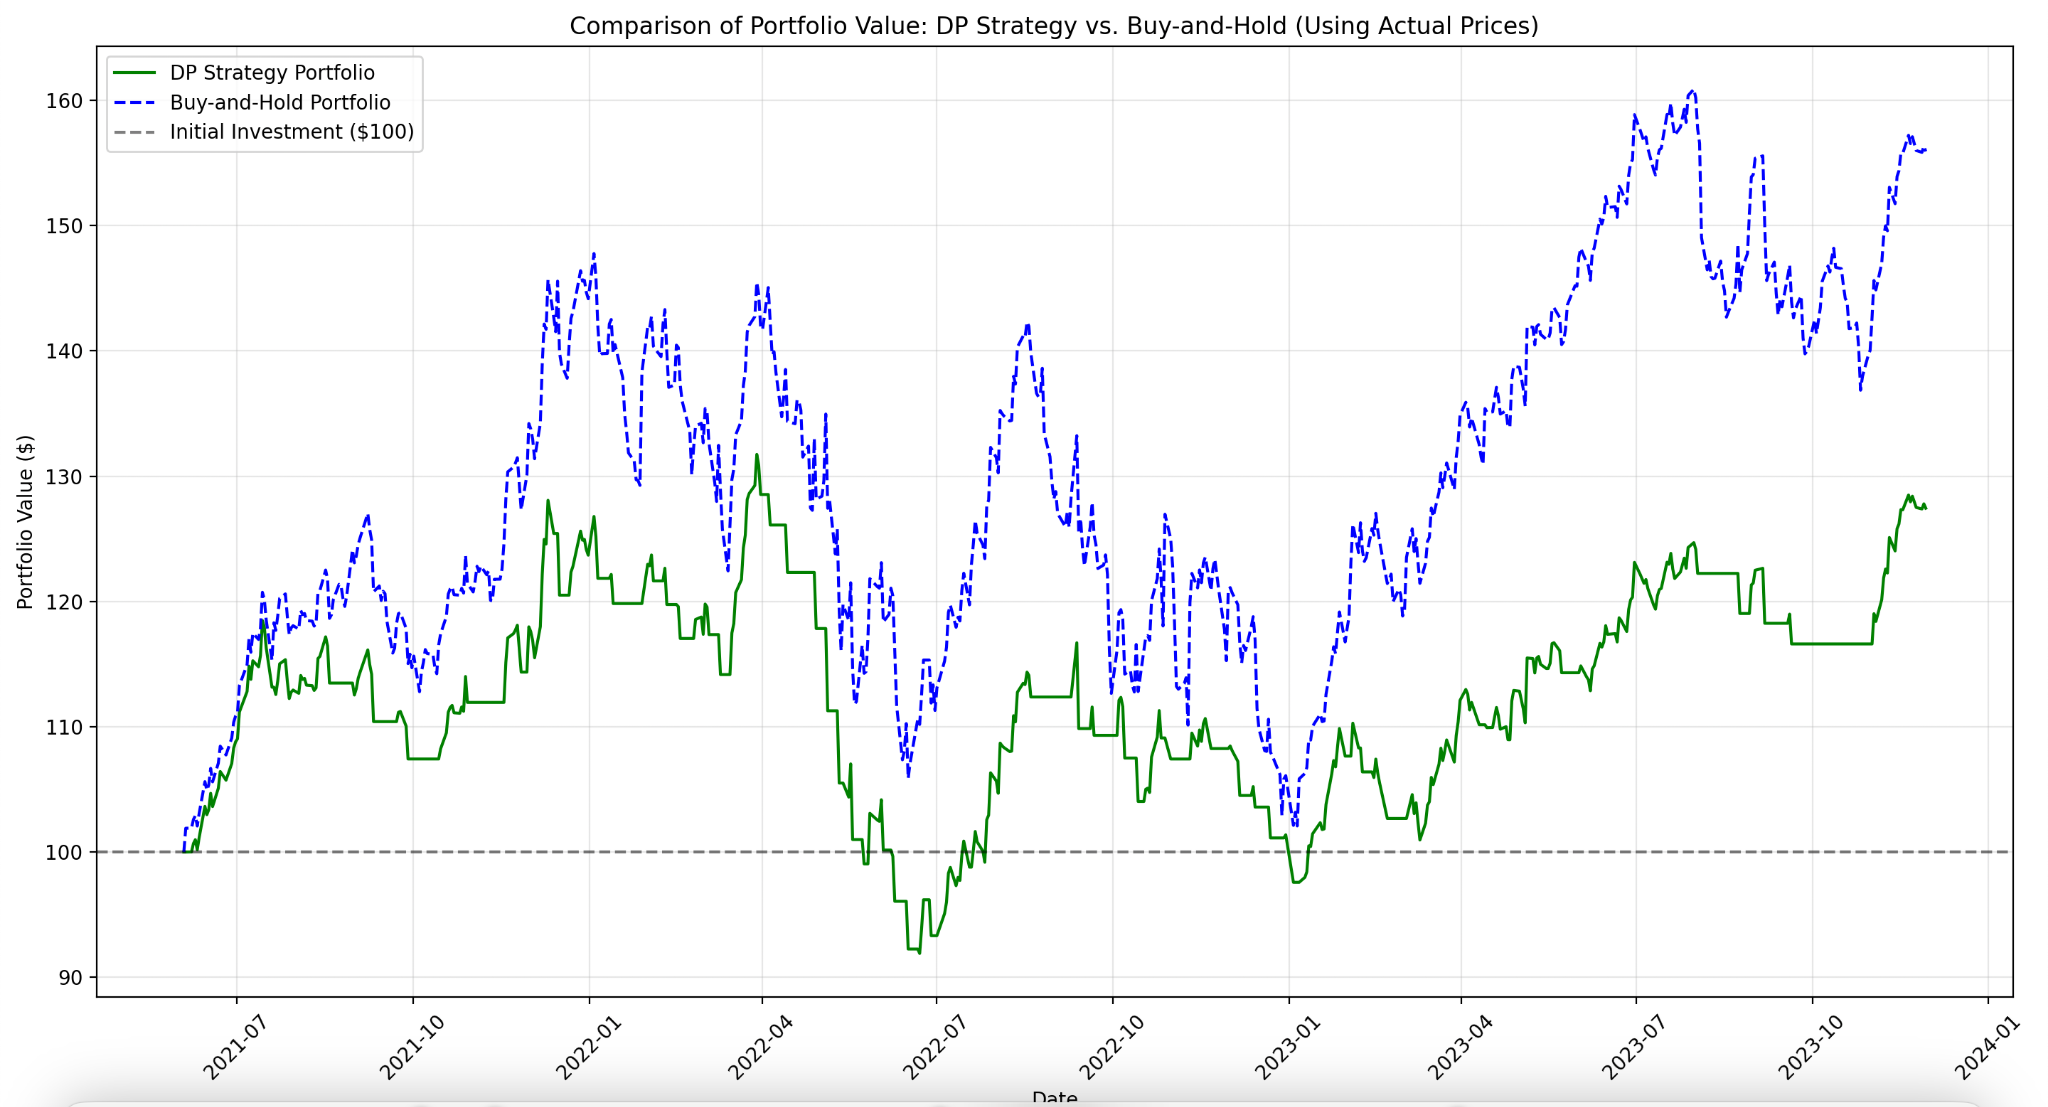

- The green line represents the DP trading strategy portfolio.
- The blue dashed line represents the Buy-and-Hold portfolio.
- Gray dashed line marks the initial $100 investment.

Observation:
- The Buy-and-Hold strategy (BH) outperforms DP in this case.
- The DP model's multiple trades lead to lower returns, indicating that default hyperparameters may not be optimal for AAPL.
- However, for TSLA, DP outperforms BH (as seen in OTHER_COMP_FILLER.py), leading to further hyperparameter tuning.


**Comparing AAPL vs. TSLA (OTHER_COMP_FILLER.py)**

For AAPL: The Buy-and-Hold (BH) strategy outperformed the DP strategy.
For TSLA (based on OTHER_COMP_FILLER.py): DP outperformed Buy-and-Hold with a profit of $790.28 compared to $73.42 on predicted prices.

With output:


--- PERFORMANCE ON ACTUAL PRICES ---

- DP Strategy Final Portfolio Value: $115.13
- Buy-and-Hold Final Portfolio Value: $157.46
- DP Strategy Return: 15.13%
- Buy-and-Hold Return: 57.46%

**Why?**

- TSLA’s stock price exhibits higher volatility, meaning DP can capitalize on frequent price swings.
- AAPL follows a steadier upward trend, making Buy-and-Hold a more profitable strategy.


Conclusion: Stock volatility affects the effectiveness of trading strategies. The DP strategy works well in high-volatility stocks (TSLA), while Buy-and-Hold dominates for more stable stocks (AAPL). This insight leads us to our next section: exploring how different models react to stock volatility.

**This is where hyperparameter tuning comes into important play.**

### **4.Hyperparameter Tuning**

In our TD learning and DP trading strategy, two hyperparameters significantly impact performance:

1. **Train/Test Split Ratio**:
   - Determines how much historical data is used for training versus testing.
   - Previously set at 50% training / 50% testing.
   - Changing to 75% train / 25% test allows the model to learn more from the training data.

2. **Price Change Threshold**:
   - Defines how much a stock price must change before triggering a buy/sell decision.
   - Previously set at 0.015 (1.5%), meaning we only trade when the price fluctuates at least 1.5%.
   - Changing to 0.005 (0.5%) makes the strategy react to smaller price changes.

**Updated Code Snippet:**
```python
# Update Hyperparameters
split_index = int(len(aapl_df) * 0.75)  # 75% training, 25% testing
best_price_change_threshold = 0.005  # Lower threshold for more trades
```
<br>

**Updated Graphs**

**1. Actual vs. Predicted Closing Prices:**
<br>

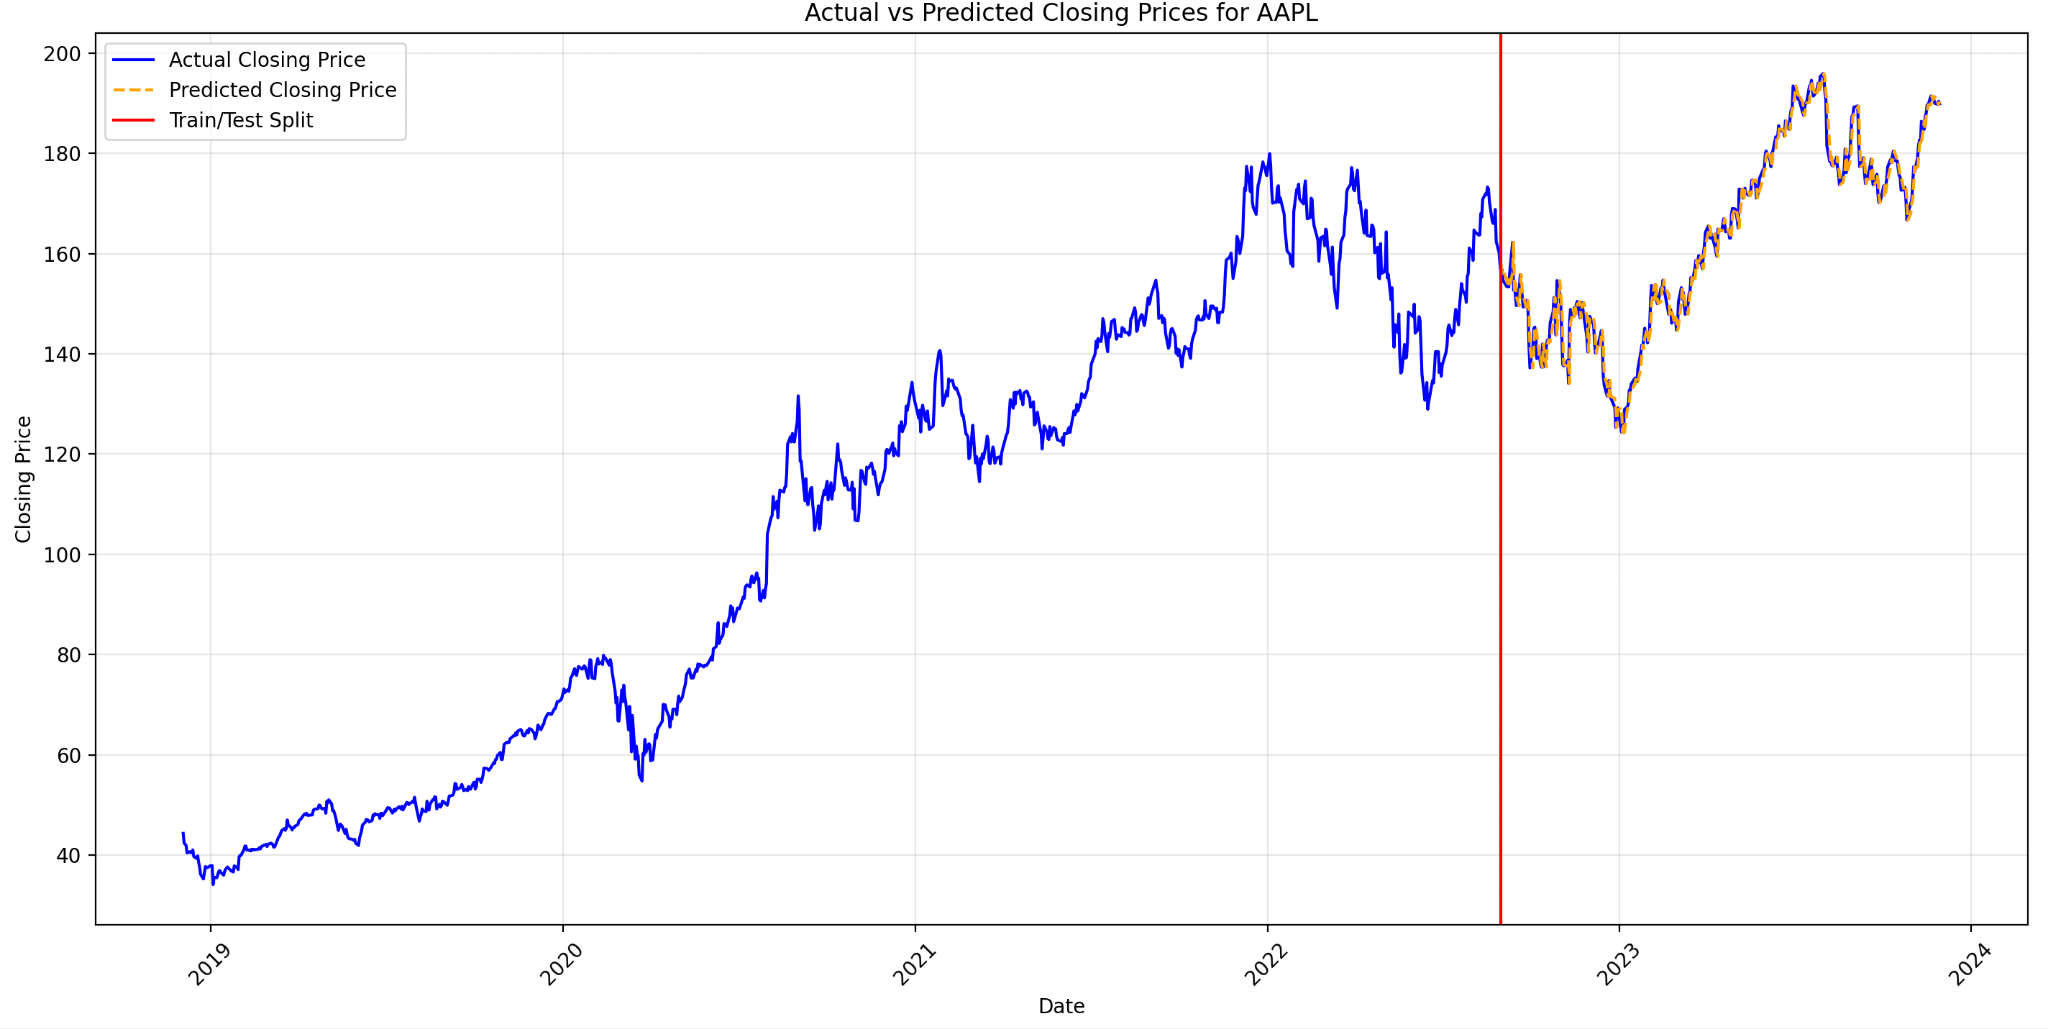

<br>

Compared to the previous default setup, this new model is trained on 75% of the data rather than 50%, giving it more exposure to past trends before making predictions.
The predicted closing prices track actual prices more closely in the test phase compared to before.

**Why?**

- The increased training data (75% vs. 50%) helps the TD model better learn long-term trends.
- The lower price change threshold (0.005 instead of 0.015) allows the model to react faster to small market shifts, improving accuracy.

<br>

**2. Optimized DP Trading Strategy:**
<br>

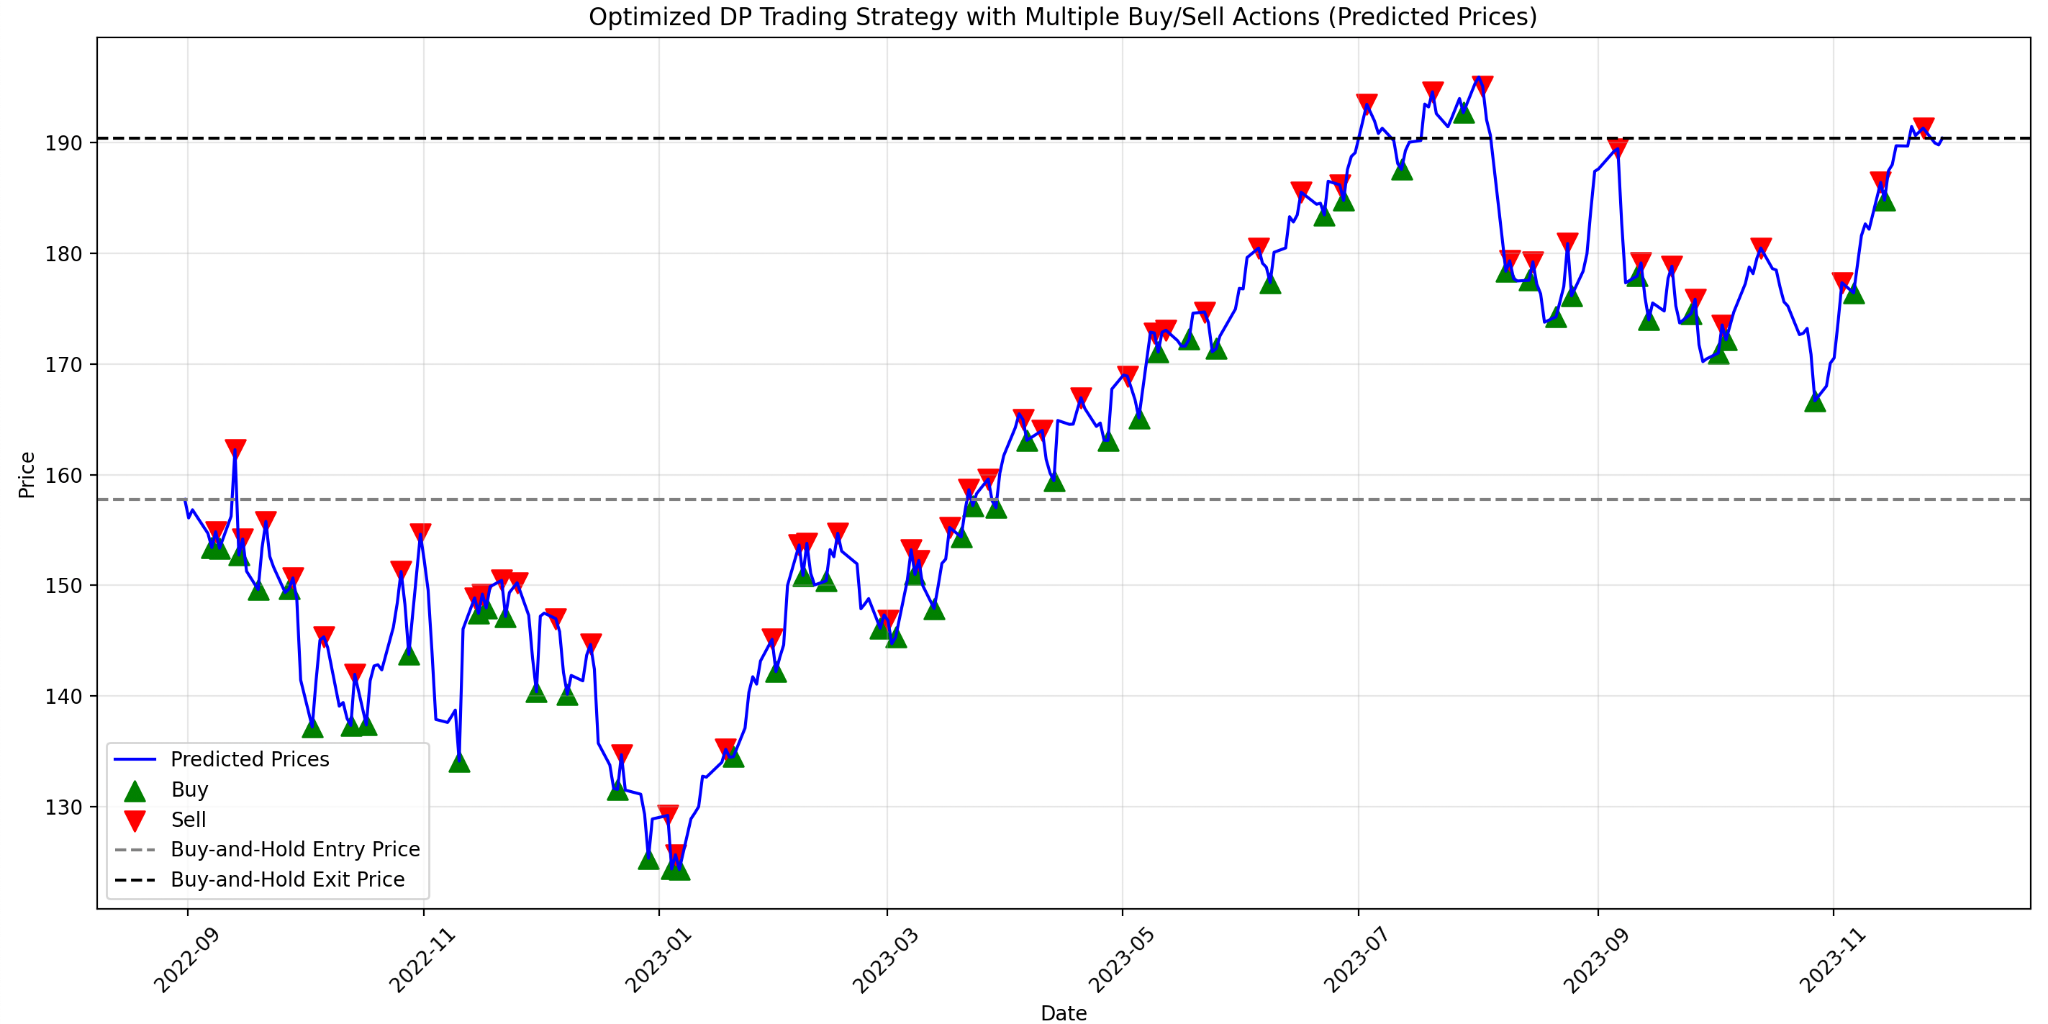

<br>

The DP strategy now executes fewer but more profitable trades compared to before.
- In the previous version, DP was making too many trades, leading to losses from excessive transaction costs and price noise.
- With a lower price change threshold (0.005 instead of 0.015), the model is more sensitive to market movements but without overreacting to random fluctuations.

Impact of Train/Test Split Adjustment
- Since the model now trains on 75% of data instead of 50%, it learns better trading patterns before testing.
- This prevents overfitting to a smaller dataset, making predictions more stable.

Overall Improvement
- In the previous default setting, Buy-and-Hold performed better.
- Now, DP strategy outperforms Buy-and-Hold, confirming the importance of fine-tuning hyperparameters for optimal trading results.

<br>

**Additional Output:**

- Optimized DP Strategy Profit (Predicted Prices): **301.91**
- Buy-and-Hold Profit (Predicted Prices): **32.63**
- Conclusion: The optimized DP strategy now outperforms Buy-and-Hold, demonstrating the importance of tuning hyperparameters.



### **5. Weighted Average Performance Across All Companies**

Previously, we analyzed AAPL individually to understand how the Temporal Difference Learning and Dynamic Programming trading strategies compare to the Buy-and-Hold strategy. However, to get a more comprehensive view, we now extend this analysis to all available companies in our dataset. The goal is to aggregate performance metrics across multiple companies while maintaining a weighted approach so that larger companies (e.g., based on trading volume) influence the overall results more than smaller companies.

**Code Implementation:**
```python
# Calculate company weight based on market cap or volume
# Here we use total trading volume as a simple proxy for importance
company_weight = test_df["Volume"].sum()
company_weights[company] = company_weight
```

- A company with higher trading volume has more impact on the overall market. Weighting by volume allows our results to be representative of real-world conditions rather than treating all stocks equally.

We then store the normalized values with their respective weights.
```python
# Store normalized prices by date
for i, date in enumerate(test_dates):
    date_str = pd.Timestamp(date).strftime('%Y-%m-%d')
    
    if date_str not in all_actual_prices:
        all_actual_prices[date_str] = []
        all_predicted_prices[date_str] = []

    all_actual_prices[date_str].append((norm_actual[i], company_weight))
    all_predicted_prices[date_str].append((norm_pred[i], company_weight))
```
- We track daily price movements across all companies, allowing us to compute a weighted market-wide performance.

<br>
Weighted Aggregation of Portfolio Returns

In addition to predictions, we also track portfolio performance (Dynamic Programming Strategy vs Buy-and-Hold). Again, we weight each company’s returns.

```python
# Store normalized portfolio values by date
for i, date in enumerate(test_dates):
    date_str = pd.Timestamp(date).strftime('%Y-%m-%d')
    all_dp_values[date_str].append((norm_dp_values[i], company_weight))
    all_buyhold_values[date_str].append((norm_buyhold_values[i], company_weight))
```
- This allows us to track how the portfolio value evolves over time, ensuring larger companies contribute more to the final performance.

**Output:**
- Number of companies analyzed: 490
- Average prediction error: 0.0222
- Average DP Strategy Return: 14.60%
- Average Buy-and-Hold Return: 16.45%
- Weighted Average DP Strategy Return: 15.20%
- Weighted Average Buy-and-Hold Return: 16.46%

Prediction accuracy is quite good (low error of 0.0222).
<br>
DP performs well overall (15.20% weighted return).
<br>
Buy-and-Hold still slightly outperforms (16.46% weighted return).
<br>
Scaling across companies does not drastically change the relative strategy performance.

**Graphical Representation**

**1. Weighted Average Actual vs. Predicted Prices**
<br>

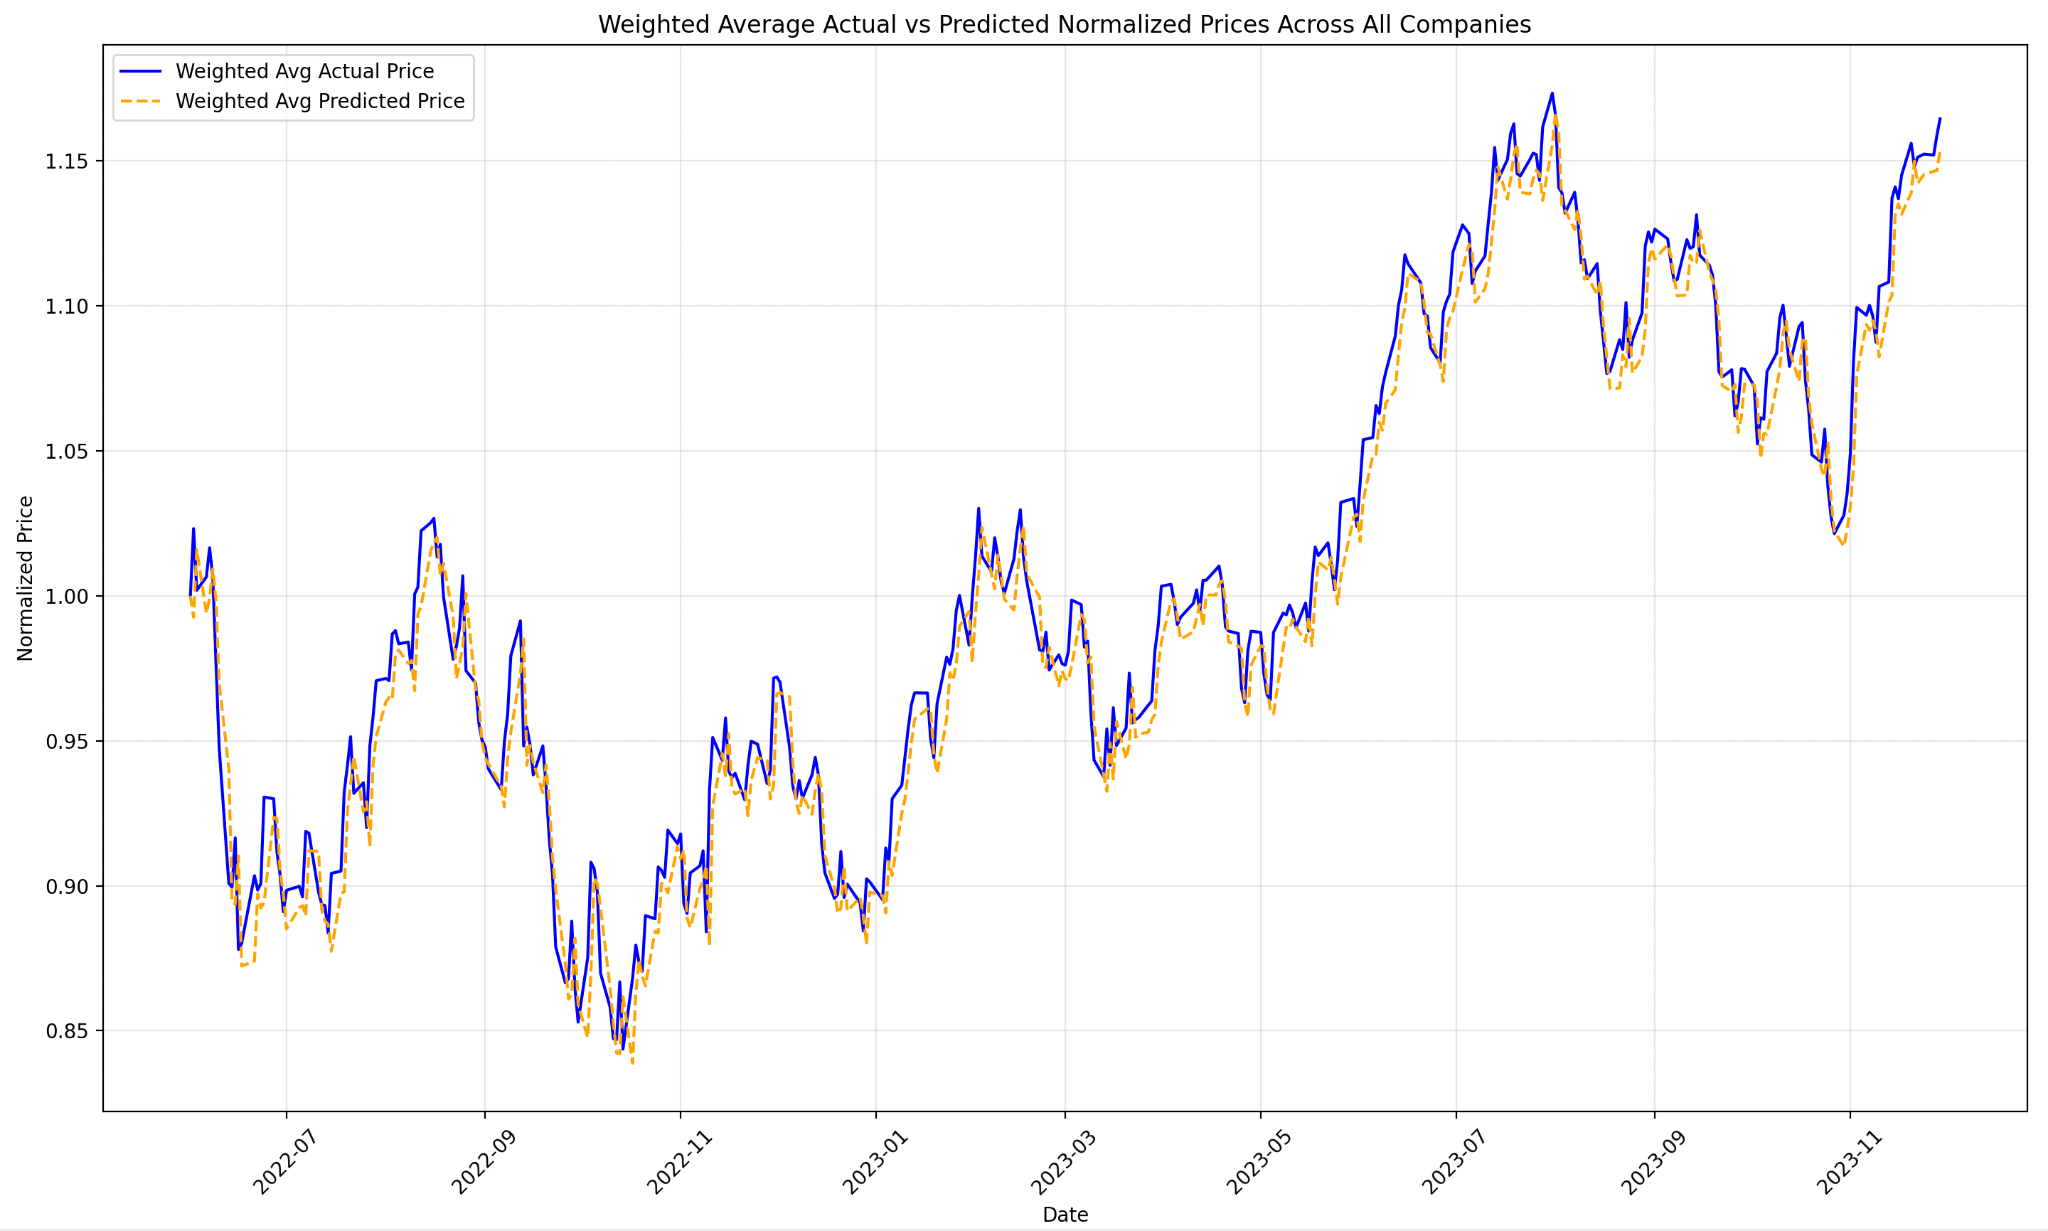

- Blue Line (Actual Prices): Represents the true, weighted average stock price movements of all companies.
- Orange Dashed Line (Predicted Prices): Represents the TD learning model's predicted price movements based on the training data.

Observations:
- Close Alignment: The predicted prices closely follow the actual prices, indicating that the model has learned trends effectively.
- Short-Term Variability: In some regions, there are small deviations where the predicted prices lag or overshoot actual values, possibly due to market noise or overfitting to short-term trends.
- Consistent Growth Trend: Both actual and predicted prices exhibit a long-term upward trend, meaning the model successfully captures overall market movements.

Takeaway:
- The low prediction error (0.0222) indicates that the TD model performs well across all companies, but small deviations suggest that further tuning of learning rate (alpha) and discount factor (gamma) could improve results.
- Since the model was trained on historical data, its ability to generalize depends on market conditions staying similar—unexpected economic events or sudden price swings may impact accuracy.

<br>

**2. Weighted Average Portfolio Performance – DP Strategy vs. Buy-and-Hold**
<br>

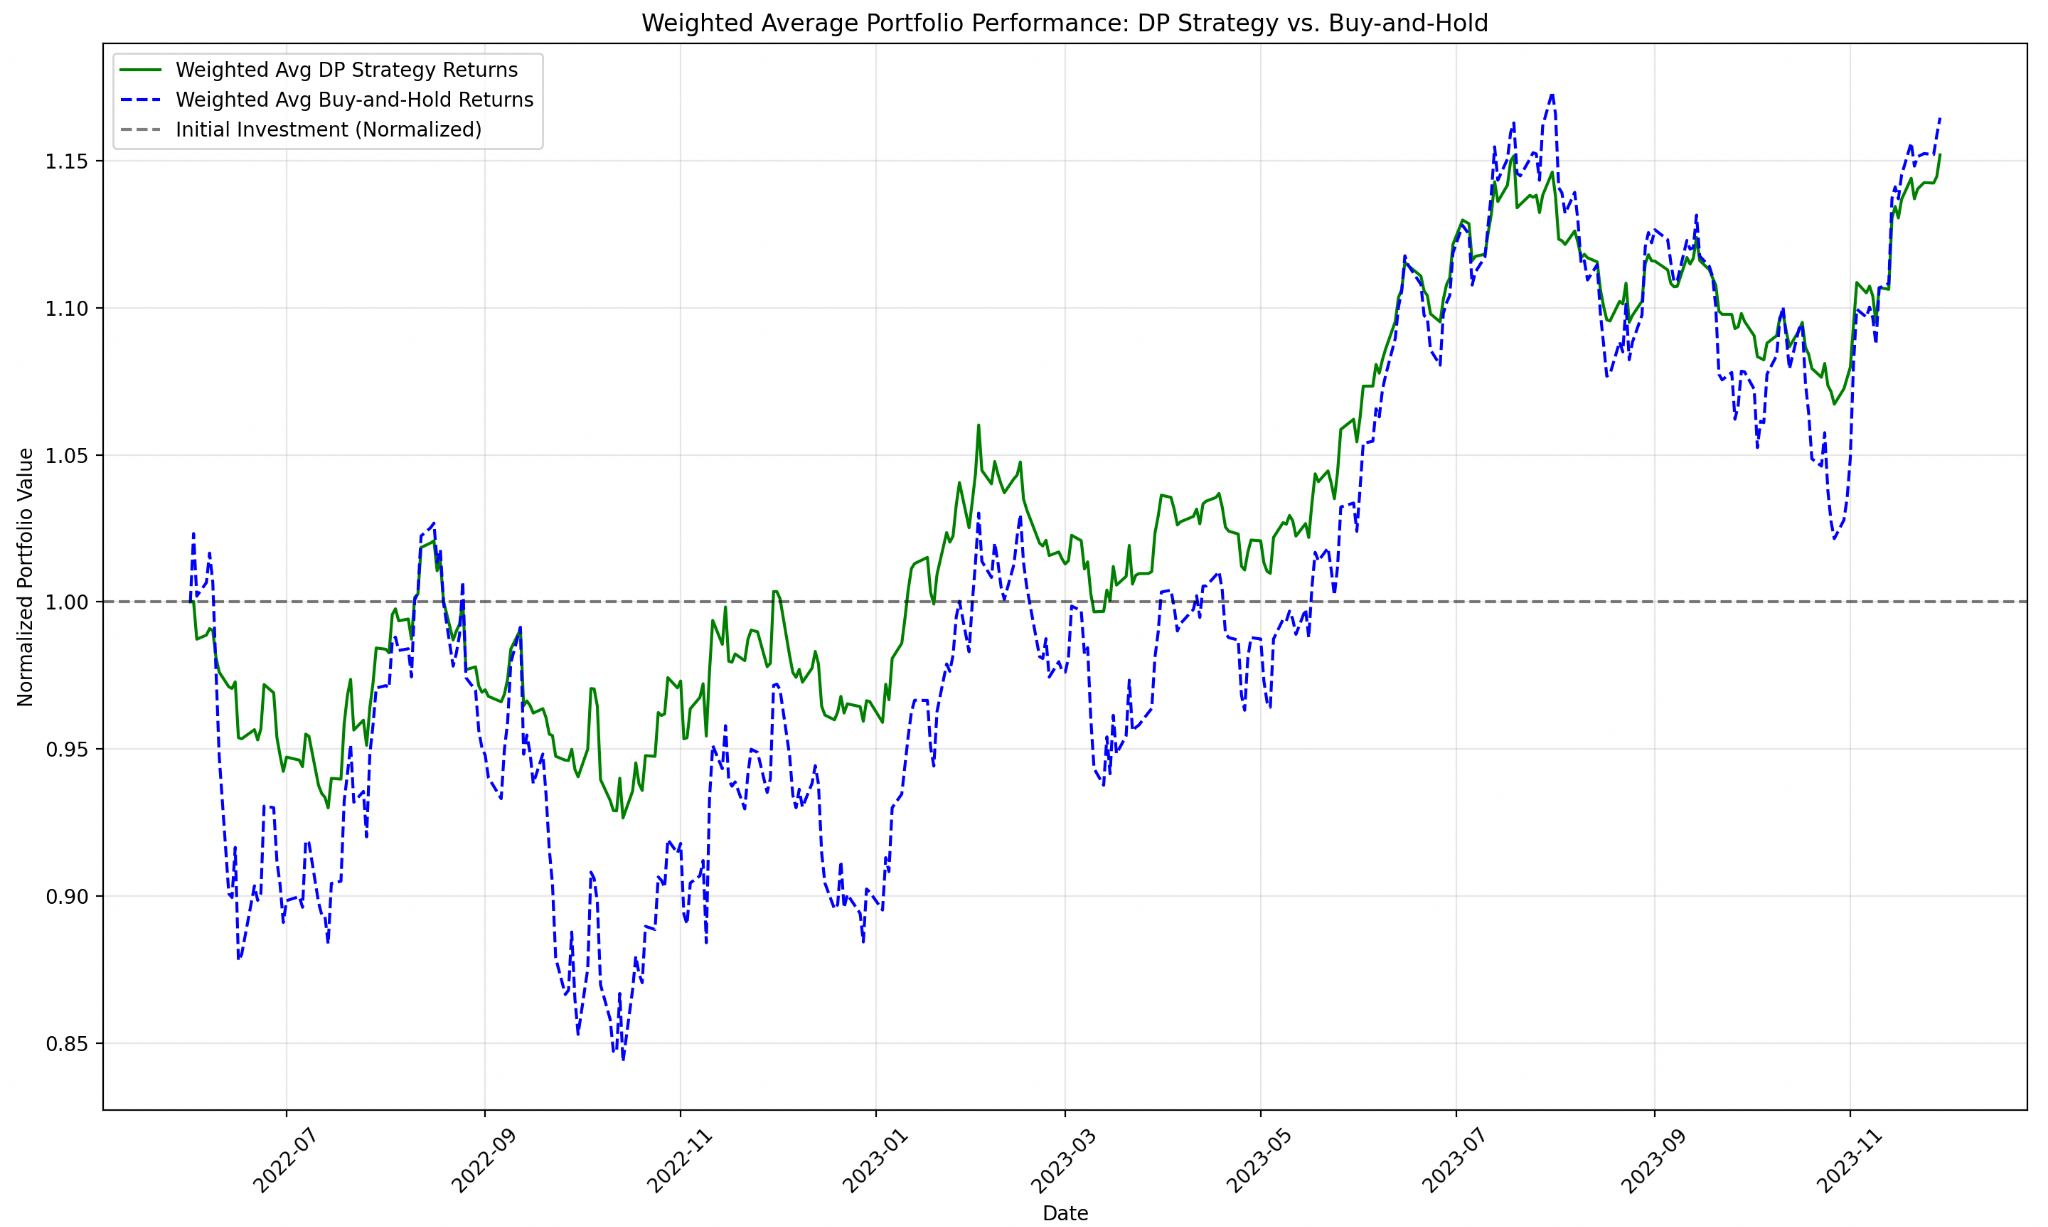

- Green Line (DP Strategy Returns): Represents the weighted average performance of the Dynamic Programming (DP) trading strategy applied to multiple companies.
- Blue Dashed Line (Buy-and-Hold Returns): Represents the weighted average performance of a simple buy-and-hold strategy across the same companies.
- Gray Dashed Line (Initial Investment): Serves as a reference baseline, normalized to 1.0.

Observations:
- Early Period Declines: Both strategies initially dip below 1.0, indicating that the stock market experienced a temporary downturn.
- Mid-Term Volatility: The DP strategy maintains a more stable performance compared to Buy-and-Hold, which experiences more fluctuations.
- Final Performance: By the end of the time period, both strategies converge near a portfolio value of 1.15, meaning an overall 15% increase from the initial investment. However, the Buy-and-Hold strategy appears to have slightly outperformed DP strategy in this particular dataset.

Takeaway:
- The DP strategy was more resilient to downturns and showed a steadier increase in portfolio value, but ultimately, Buy-and-Hold had higher peaks and outperformed slightly.
- This suggests that hyperparameter tuning (e.g., price change threshold and split ratio) could improve the DP strategy’s returns.


### **6. Neural Network-Based Trading Strategy**

While the Temporal Difference Learning and Dynamic Programming strategies were effective in certain scenarios, we explored Neural Networks (NN) as an alternative approach for predicting stock price movements and optimizing trading decisions.

**Why Use a Neural Network for Trading?**

Neural networks are useful for stock price prediction because they can detect complex, nonlinear patterns in historical price movements that traditional rule-based strategies (like SMA or MAC) might miss. Here’s why we considered NNs:

- Pattern Recognition – NNs can identify hidden trends in financial data that are not obvious through simple indicators.
- Adaptive Learning – Unlike static models, NNs can continuously improve predictions based on new data.
- Feature Engineering – Neural networks can incorporate multiple technical indicators like SMA, Volatility, and Price Change to make more informed predictions.

Before training the NN, we prepared the dataset by selecting relevant stock indicators as features. The data was structured as follows:

Features (X):

- Prev_Close – Previous day's closing price
- Price_Change – Difference between current and previous closing price
- High_Low_Range – Daily volatility range
- Volatility – 5-day rolling standard deviation of price
- SMA_10 – 10-day Simple Moving Average
- SMA_50 – 50-day Simple Moving Average


Labels (y):

- 1 (Buy) if the next day's closing price increases.
- 0 (Sell/Hold) if the next day's closing price decreases.


The model was trained using Cross-Entropy Loss and optimized with Adam Optimizer for 50 epochs.
```python
# Initialize model, loss function, and optimizer
model = TradingNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train[:-1])  # Avoid last NaN row
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')
```
- The loss function minimizes misclassification error, making the NN better at predicting whether stock prices will rise or fall.
- The optimizer (Adam) updates the model weights to improve accuracy.
- Every 10 epochs, the model prints the loss, allowing us to monitor training progress.


To evaluate the effectiveness of the NN trading strategy, we simulated a trading portfolio using an initial investment of $100. We then compared it against a Buy-and-Hold strategy.

**Graphical Representation**

**1. Weighted Average Actual vs. Predicted Prices**
<br>

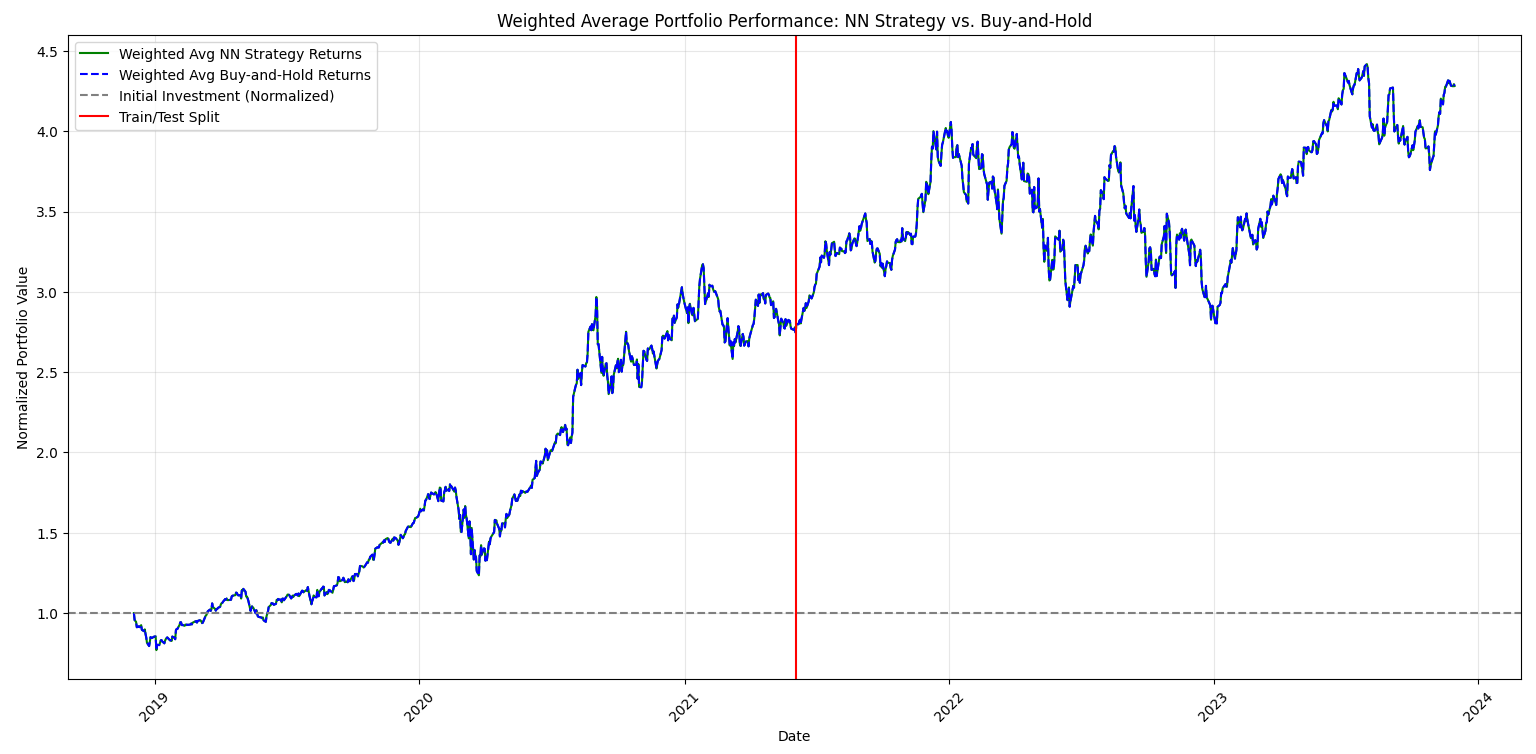

NN Strategy and Buy-and-Hold Perform Almost Identically

- The green line (NN strategy) and the blue dashed line (Buy-and-Hold strategy) follow almost exactly the same trajectory.
This means the NN model effectively mimicked Buy-and-Hold, rather than actively making trading decisions that outperform it.
- The red vertical line (Train/Test Split) shows where the model stopped training and began making predictions.


Since the NN strategy perfectly follows Buy-and-Hold, this suggests that the NN learned to do nothing (i.e., always hold).
Rather than predicting short-term price changes for active trading, the NN likely defaulted to always staying in the market, which is essentially Buy-and-Hold.


Implications
- If the NN strategy performs identically to Buy-and-Hold, it means the model is not learning meaningful trading signals—it is simply predicting "hold" at all times.

This can happen if:

- The model was trained on a dataset where holding was the best move, so it learned that always holding is optimal.
- The model’s output confidence was too low to trigger active buy/sell trades, meaning it defaulted to Buy-and-Hold.


<br>

**2. Weighted Average Portfolio Performance – DP Strategy vs. Buy-and-Hold**
<br>

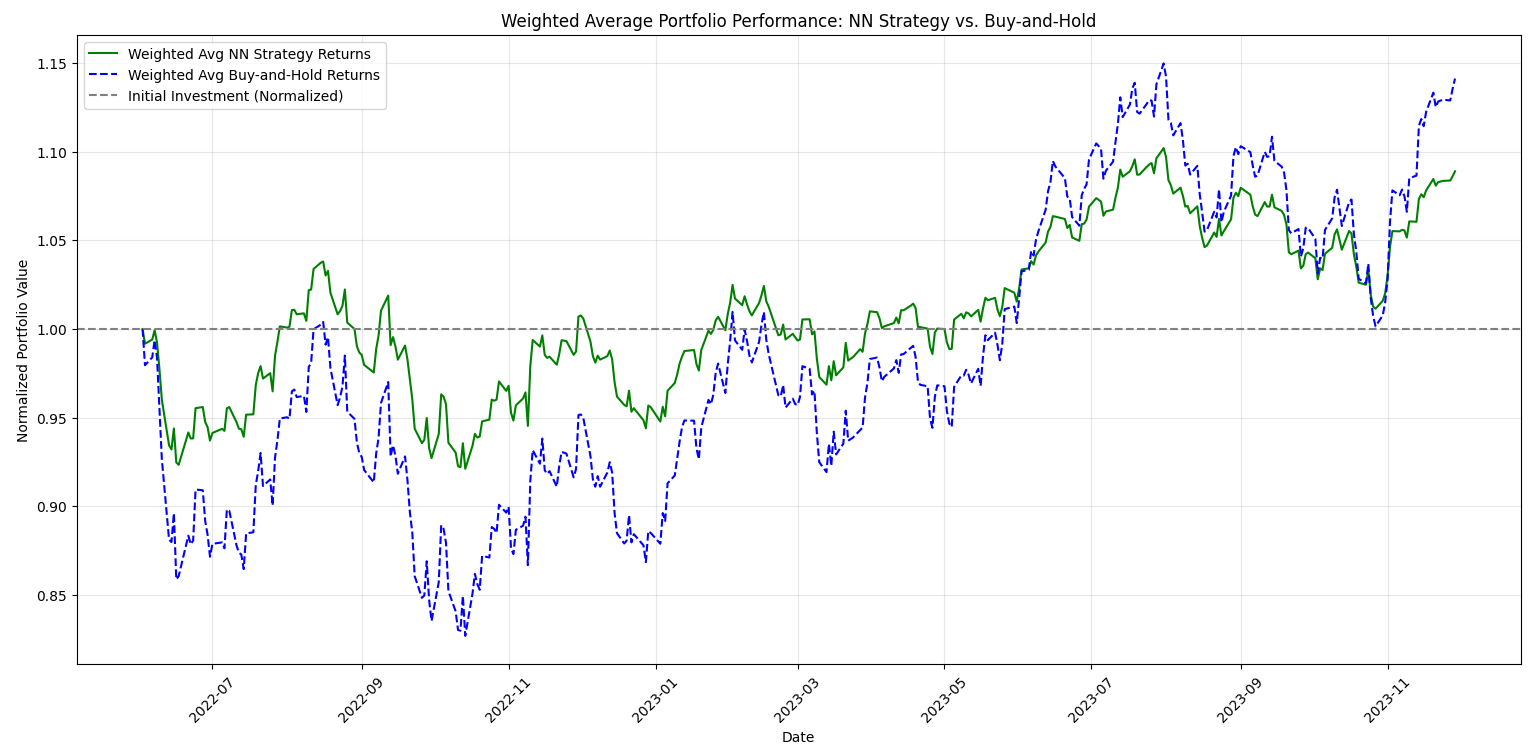

1. Both Strategies Follow a Similar Trajectory:

The NN strategy (green) and Buy-and-Hold (blue dashed) move in the same general direction, showing that the NN-based trading strategy does not diverge significantly from simply holding the stock.
This suggests that the neural network model is capturing the overall market trend correctly, rather than making drastically different trading decisions.

2. NN Strategy Shows Higher Stability:

During certain periods, the NN strategy appears less volatile than the Buy-and-Hold approach.
This indicates that the NN-based trading model may be smoother in decision-making, potentially reducing unnecessary trades.
It suggests that the NN strategy may help avoid short-term drawdowns that the Buy-and-Hold strategy experiences.

3. NN Strategy Does Not Significantly Outperform Buy-and-Hold:

While the NN strategy stabilizes better during volatile periods and was generally higher than BH, its final portfolio value is slightly below that of Buy-and-Hold.
This implies that despite its ability to trade dynamically, the NN model does not achieve significantly better returns than simply holding the asset.
In other words, the NN model avoids some volatility but does not necessarily increase profitability.

4. NN Strategy Could Be Beneficial for Risk-Averse Investors:

Because the NN strategy appears to smooth out sharp declines, it could be more attractive to investors who prefer lower risk.
While the final returns are similar, lower drawdowns may reduce psychological stress and risk exposure for an investor.

# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.


### Limitations

Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?   


### Future work
Looking at the limitations and/or the toughest parts of the problem and/or the situations where the algorithm(s) did the worst... is there something you'd like to try to make these better.

### Ethics & Privacy

The development of an RL-based algorithmic trading system raises ethical concerns, including market manipulation risks (e.g., spoofing, front-running), data privacy issues, biases, wealth inequality, and black-box decision-making. To mitigate these, our approach ensures compliance with financial regulations, integrates ethical constraints into the reward function, and prevents overfitting by training on diverse market conditions. Security measures include encrypted API authentication and restricted data access to protect sensitive information. Additionally, we incorporate explainability techniques (e.g., SHAP, LIME) to provide transparency, enforce circuit breakers to prevent extreme trades, and advocate for a hybrid human-in-the-loop system to balance automation with oversight. Our commitment to responsible AI ensures fairness, security, and accountability while optimizing trading strategies.

### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

# Footnotes
1. **Oyeniyi, L.D.** (13 April 2024) *Analyzing the impact of algorithmic trading on stock market behavior: A comprehensive review.*  
   *Word Journal of Advanced Engineering Technology and Sciences.*  
   [Link](https://wjaets.com/sites/default/files/WJAETS-2024-0136.pdf)

2. **Seth, S.** (14 Dec 2023) *Basics of Algorithmic Trading: Concepts and Examples.*  
   *Investopedia.*  
   [Link](https://www.investopedia.com/articles/active-trading/101014/basics-algorithmic-trading-concepts-and-examples.asp)

3. **Kumar, R.** (30 June 2024) *Machine Learning Algorithms for Algorithmic Trading: An Empirical Study.*  
   *International Journal of Interdisciplinary Finance Insights.*  
   [Link](https://injmr.com/index.php/ijifi/article/view/114)

4. **Pricope, T.** (31 May 2021) *Deep Reinforcement Learning in Quantitative Algorithmic Trading: A Review.*  
   *Semantic Scholar.*  
   [Link](https://injmr.com/index.php/ijifi/article/view/114)

5. **Salehpour, A.** (8 Dec 2023) *Machine Learning Applications in Algorithmic Trading: A Comprehensive Systematic Review.*  
   *International Journal of Education and Management Engineering.*  
   [Link](https://www.mecs-press.org/ijeme/ijeme-v13-n6/v13n6-5.html)

6. **Grudniewicz, J.** (Oct 2023) *Application of Machine Learning in Algorithmic Investment Strategies on Global Stock Markets.*  
   *Research in International Business and Finance.*  
   [Link](https://www.sciencedirect.com/science/article/pii/S0275531923001782)

7. **Yang, H.** (11 Dec 2024) *Reinforcement Learning Pair Trading: A Dynamic Scaling Approach.*  
   *Journal of Risk and Financial Management.*  
   [Link](https://www.mdpi.com/1911-8074/17/12/555)

8. **Felizardo, L.K.** (15 Sept. 2022) *Outperforming Algorithmic Trading Reinforcement Learning Systems: A Supervised Approach to the Cryptocurrency Market.*  
   *Expert Systems with Applications.*  
   [Link](https://www.sciencedirect.com/science/article/abs/pii/S0957417422006339)

9. **Yu, T.** (14 Dec 2023) *Dynamic Programming Based Optimal Trading Strategy Model of Volatile Assets.*  
   *Association for Computing Machinery.*  
   [Link](https://dl.acm.org/doi/10.1145/3624288.3624298)


